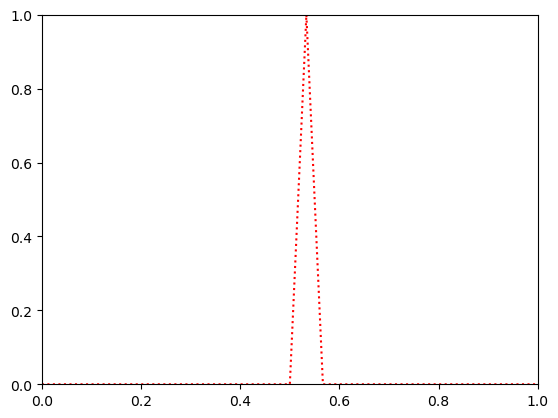

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.linalg # library needed for matrices

# perform initial set up for number of points in time and space
L=1.0; T=1.0
Nx_spaces = 30; Nt_gaps = 50; 
Nx_points = Nx_spaces +  1 ; Nt_points = Nt_gaps + 1
x = np.linspace(0, L, Nx_points)   # mesh points in space
dx = x[1] - x[0]

t = np.linspace(0, T, Nt_points) # mesh points in time
dt = t[1] - t[0]
D = 0.1
C = D*dt/dx**2
lamda = 10.0
C_lamda = lamda * dt

# set up structures to hold U and U_ex2 and interim arrays
u   = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)
U = np.zeros((Nx_points,Nt_points))

# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

# set up the matrix A
for i in range(1, Nx_points - 1):
    A[i, i - 1] = -C
    A[i, i + 1] = -C
    A[i, i] = 1 + dt*lamda +2*C

A[0,0] = 1+2*C  ; A[0,1]= -2*C 
A[Nx_points-1,Nx_points-1] = 1+2*C 
A[Nx_points-1,Nx_points-2] = -2*C

# find the inverse of A and use for all points
Ainv = np.linalg.inv(A)

# function for setting the initial condition in space  I(x)
#def I2(x):
 #   return x

# ALternative 
def I2(x):
    n = x.size
    I2_arr = np.zeros(n)
    
   
    I2_arr[round(n/2)] = 1
    return I2_arr


# Set initial condition u(x,0) = I(x)
u_old = I2(x) # no dirichlet boundary conditions in this example

# initialise matrices U and U_ex2 for first time step
U[:,0] = u_old[:]


#perform time=stepping
for n in range(1, Nt_points): # timestep for 1 to t = T-1 so last step finishes on t=T
    # Compute b and solve linear system
    b[:] = u_old[:]
    u[:] = np.dot(Ainv,b)
    # Update u_1 before next step
    u_old = u
    U[:,n] = u

    
# set up animation plots
fig, ax = plt.subplots()
ax.axis([0,1,0,1])

#animation plots
def animate(i):
    l.set_data(x, U[:,i])
    
ax.axis([0,1,0,1.0])
l, = ax.plot([],[],':r')


ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt_points)

from IPython.display import HTML
HTML(ani2.to_jshtml())